# Actividad M1.2 Datos Faltantes y Outliers

### Carlos Adrián Palmieri Álvarez - A01635776
### Cynthia Cristal Quijas Flores - A01655996

## Carga de datos y bibliotecas

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/raw/student-mat_v3.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4.0,at_home,teacher,...,4,3,4,1.0,1,3,6.0,5,6,6
1,GP,F,17,U,GT3,T,1,1.0,at_home,other,...,5,3,3,1.0,1,3,4.0,5,5,6
2,GP,F,15,U,LE3,T,1,1.0,at_home,other,...,4,3,2,NaN,3,3,NaN,7,8,10
3,GP,F,15,U,GT3,T,4,NaN,health,services,...,3,2,2,1.0,1,5,2.0,15,14,15
4,GP,F,16,U,GT3,T,3,3.0,other,other,...,4,3,2,NaN,2,5,4.0,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,NaN,services,services,...,5,5,4,4.0,5,4,NaN,9,9,9
391,MS,M,17,U,LE3,T,3,1.0,services,services,...,2,4,5,3.0,4,2,3.0,14,16,16
392,MS,M,21,R,GT3,T,1,1.0,other,other,...,5,5,3,3.0,3,3,NaN,10,8,7
393,MS,M,18,R,LE3,T,3,2.0,services,other,...,4,4,1,3.0,4,5,0.0,11,12,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    int64  
 7   Fedu        363 non-null    float64
 8   Mjob        395 non-null    object 
 9   Fjob        375 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  369 non-null    float64
 13  studytime   395 non-null    int64  
 14  failures    395 non-null    int64  
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

## 1. Identificar el porcentaje de datos faltantes.

In [4]:
# Seleccionar la columna absences y traveltime
df_abs_travel = df[["absences", "traveltime"]]
df_abs_travel


,absences,traveltime
0,6.0,2.0
1,4.0,1.0
2,NaN,1.0
3,2.0,1.0
4,4.0,1.0
...,...,...
390,NaN,1.0
391,3.0,2.0
392,NaN,1.0
393,0.0,3.0


In [5]:
df.isna()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
391,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
392,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
393,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
print(df.isna().sum())

school         0
sex            0
age            0
address        0
famsize        0
Pstatus        0
Medu           0
Fedu          32
Mjob           0
Fjob          20
reason         0
guardian       0
traveltime    26
studytime      0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       0
goout          0
Dalc          71
Walc           0
health         0
absences      21
G1             0
G2             0
G3             0
dtype: int64


In [20]:
print("Cantidad de valores nulos en absences y traveltime:")
print(df_abs_travel.isna().sum())

Cantidad de valores nulos en absences y traveltime:
absences      0
traveltime    0
dtype: int64


In [8]:
# Identificar los valores faltantes por columna y determinar el porcentaje de valores faltantes
# Sumar los valores NaN por columna
suma_na = df_abs_travel.isna().sum()

# Total de registros
total_registros = len(df)

# Calcular el porcentaje de NaN por columna
porcentaje_na = (suma_na / total_registros) * 100

# Mostrar el resultado
print(F"Los porcentajes de valores faltantes por columna son (# registros totales: {total_registros}):")
print(porcentaje_na)

Los porcentajes de valores faltantes por columna son (# registros totales: 395):
absences      5.316456
traveltime    6.582278
dtype: float64


## 2. Identificar el mecanismo que ocasiona datos faltantes (MCAR, MAR, NMAR)}

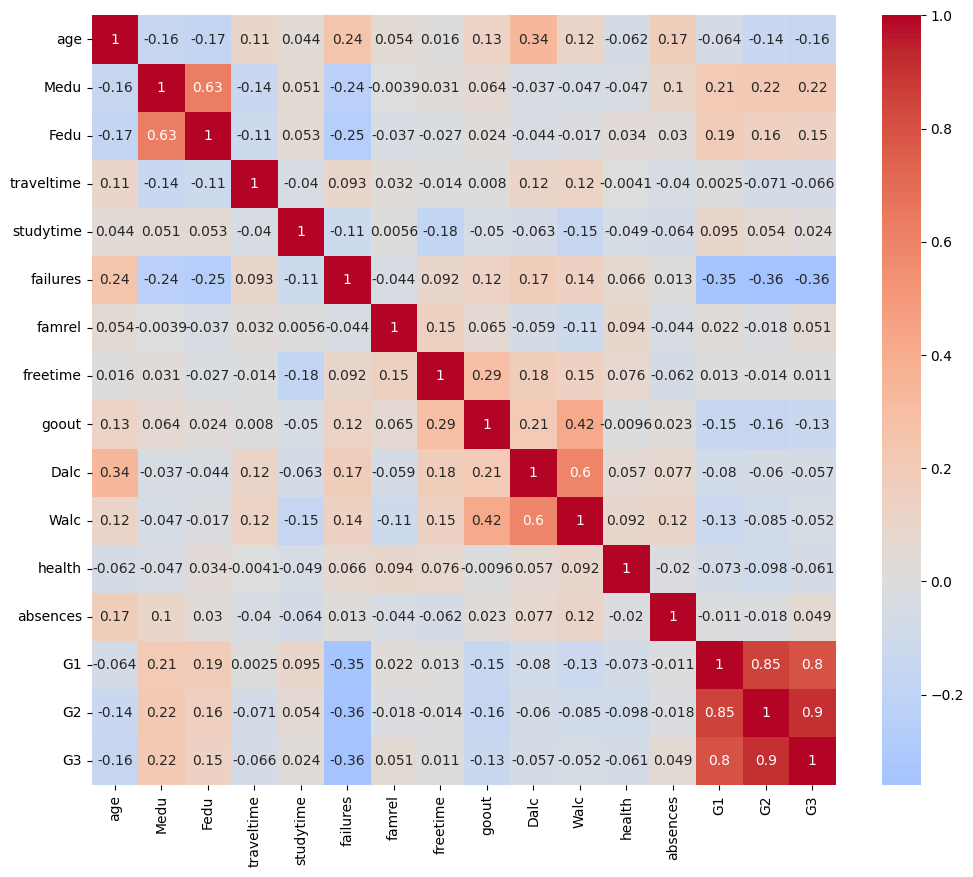

In [9]:
# Seleccionando sólo los valores float o int
df_cor = df.select_dtypes(include=['float64', 'int64'])
df_cor

# Generar un diagrama de correlaciión de todas las variables numéricas
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(df_cor.corr(), annot=True, cmap='coolwarm', center=0)
plt.show()



Se determinó que el mecanismo que provoca la falta de datos es: NMAR debido a que en el modelo de correlación no se encuentra alguna relación con alguna otra variable numerica del dataset, por lo tanto, quedaría como MCAR o NMAR y debido a que el número de faltas se puede omitir por la ausencia de la información a la misma, específicamos que la opción es NMAR, es decir, Not Missing At Random.

# 3. Obtener estadísticas descriptivas de los datos (histograma, media, desviación estándar,mediana, moda, etc).

### Media, Desviación estándar, mediana, moda

In [10]:
print(df_abs_travel.describe())

         absences  traveltime
count  374.000000  369.000000
mean     5.542781    1.528455
std      8.089117    0.902820
min      0.000000    1.000000
25%      0.000000    1.000000
50%      3.500000    1.000000
75%      8.000000    2.000000
max     75.000000    8.000000


In [11]:
print("Promedio de absence y traveltime: ",df_abs_travel.mean())
print("\nMediana de absence y traveltime: ",df_abs_travel.median())
print("\nModa de absence y traveltime: ",df_abs_travel.mode())
print("\nDesviación estándar de absence y traveltime: ",df_abs_travel.std())
print("\nVarianza de absence y traveltime: ",df_abs_travel.var())

Promedio de absence y traveltime:  absences      5.542781
traveltime    1.528455
dtype: float64

Mediana de absence y traveltime:  absences      3.5
traveltime    1.0
dtype: float64

Moda de absence y traveltime:     absences  traveltime
0       0.0         1.0

Desviación estándar de absence y traveltime:  absences      8.089117
traveltime    0.902820
dtype: float64

Varianza de absence y traveltime:  absences      65.433822
traveltime     0.815085
dtype: float64


### Histograma

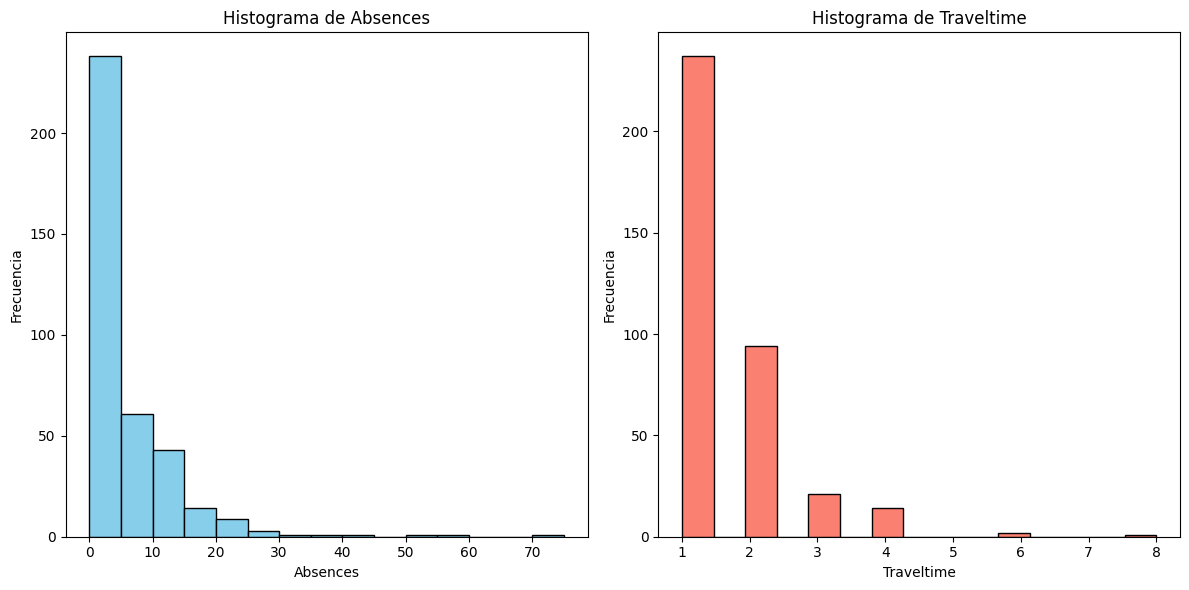

In [12]:
import matplotlib.pyplot as plt

# Crear un histograma para 'absences'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df_abs_travel['absences'].plot(kind='hist', bins=15, color='skyblue', edgecolor='black')
plt.title('Histograma de Absences')
plt.xlabel('Absences')
plt.ylabel('Frecuencia')

# Crear un histograma para 'traveltime'
plt.subplot(1, 2, 2)
df_abs_travel['traveltime'].plot(kind='hist', bins=15, color='salmon', edgecolor='black')
plt.title('Histograma de Traveltime')
plt.xlabel('Traveltime')
plt.ylabel('Frecuencia')

# Mostrar los histogramas
plt.tight_layout()
plt.show()

# 4. Utilizar el método de imputación adecuado para cada una de las variables con datos faltantes. ◦ Imputación Simple: Media, Mediana, Moda

### Boxplot antes de la imputación de datos

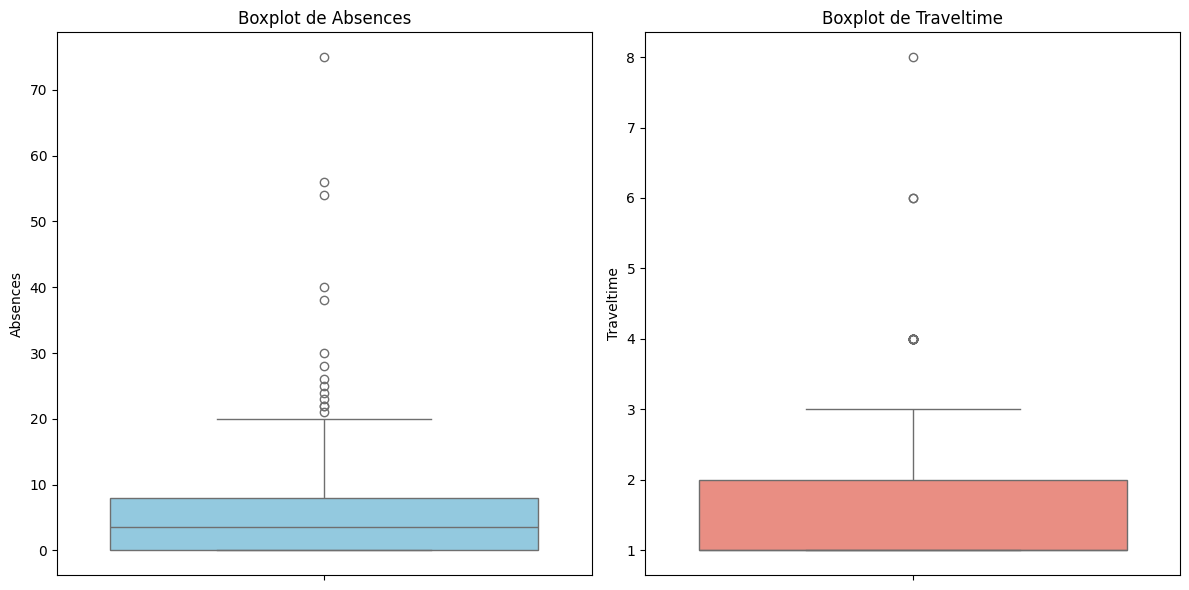

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear un boxplot para 'absences'
plt.subplot(1, 2, 1)
sns.boxplot(data=df_abs_travel, y='absences', color='skyblue')
plt.title('Boxplot de Absences')
plt.ylabel('Absences')

# Crear un boxplot para 'traveltime'
plt.subplot(1, 2, 2)
sns.boxplot(data=df_abs_travel, y='traveltime', color='salmon')
plt.title('Boxplot de Traveltime')
plt.ylabel('Traveltime')

# Mostrar los boxplots
plt.tight_layout()
plt.show()

En el caso del primer diagrama de caja y bigote quiere decir que el 75% de los alumnos tuvieron menos de 10 faltas aproximadamente, no obstante, hubo algunos casos donde los registros [outliers] indican la presencia de alumnos con faltas entre 20 y 60. Esto podría indicar mala captura de datos o que hubo factores que influyeron en la vida de esos estudiantes como enfermedades o viajes que generaron ese incremento tan significativo, por esto mismo en análisis o modelos predictivos más soficticados podrían ser excluidos o normalizados. Además, hay que destacacr que la mediana se encuentra en un valor cercano a cero, por lo que podemos saber que los alumnos tienden a tener pocas faltas.

En el caso del segundo diagrama de caja y bigote, representa la variable traveltime y podemos observar que la caja es más pequeña, lo que sugiere que la mayoría de los estudiantes tienen tiempos de viaje similares. La mayor parte de los tiempos de viaje están entre la categoría 1 y 2. La mediana es 1, lo que indica que el tiempo de viaje típico para la mayoría de los estudiantes es de menos de 15 minutos. Hay algunos outliers por encima del bigote superior, lo que significa que algunos estudiantes tienen tiempos de viaje significativamente más largos.

### Imputación de los datos

Usando la moda en la variable traveltime debido a que es una variable categórica

In [14]:
# Calcular la moda para la variable traveltime
moda_traveltime = df_abs_travel["traveltime"].mode()[0]

# Sustituir los valores nulos con la moda
df_abs_travel["traveltime"].fillna(moda_traveltime, inplace=True)

traveltime_sum_na = df_abs_travel["traveltime"].isna().sum()

traveltime_sum_na

print(traveltime_sum_na)

0


C:\Users\palmi\AppData\Local\Temp\ipykernel_66232\1557667008.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abs_travel["traveltime"].fillna(moda_traveltime, inplace=True)


En en el caso de la variable absences, como se puede observar tanto el histograma como en el diagrama de caja y bigote, no tiene uns distribucicón que se comporte normal, por lo que podríamos saber que es asimétrico y numérico. Una vez mencionado esto último se eligió imputar la mediana en los valores nulos para esta variable.

In [15]:
# Calcular la mediana para la variable absences
mediana_absences = df_abs_travel["absences"].median()

# Sustituir los valores nulos en absences con la mediana
df_abs_travel["absences"].fillna(mediana_absences, inplace=True)

absences_sum_na = df_abs_travel["absences"].isna().sum()

absences_sum_na

C:\Users\palmi\AppData\Local\Temp\ipykernel_66232\3145535954.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abs_travel["absences"].fillna(mediana_absences, inplace=True)


np.int64(0)

In [16]:
# Verificando si hay valores nulos
df_abs_travel.isna().sum()

absences      0
traveltime    0
dtype: int64

# 5. Realizar un boxplot e interpretarlo.

### Boxplot

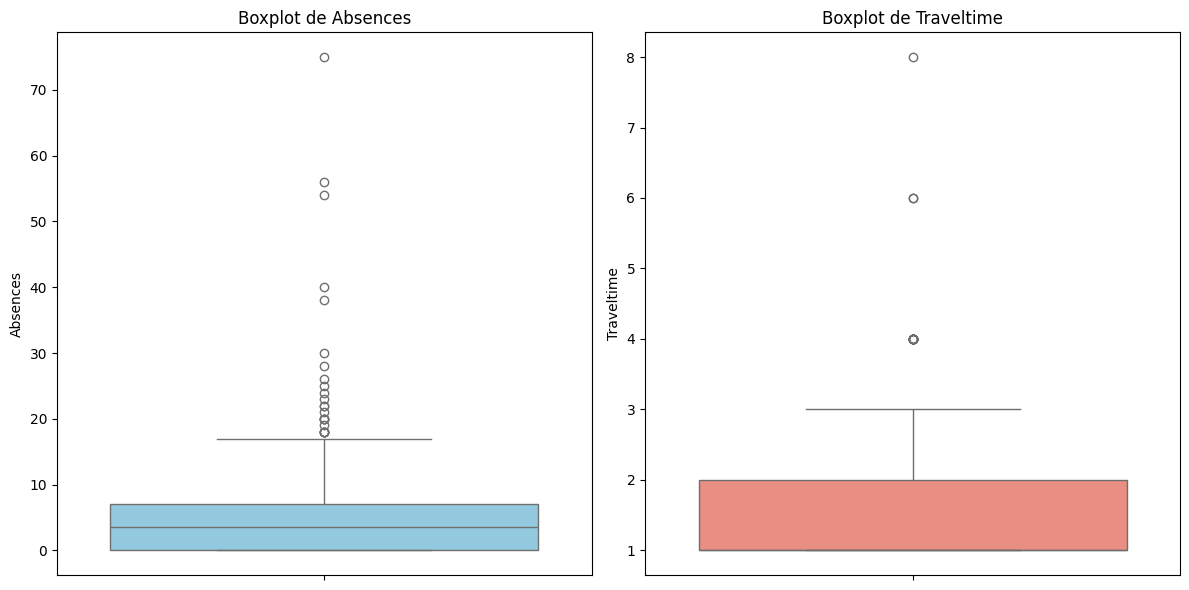

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear un boxplot para 'absences'
plt.subplot(1, 2, 1)
sns.boxplot(data=df_abs_travel, y='absences', color='skyblue')
plt.title('Boxplot de Absences')
plt.ylabel('Absences')

# Crear un boxplot para 'traveltime'
plt.subplot(1, 2, 2)
sns.boxplot(data=df_abs_travel, y='traveltime', color='salmon')
plt.title('Boxplot de Traveltime')
plt.ylabel('Traveltime')

# Mostrar los boxplots
plt.tight_layout()
plt.show()

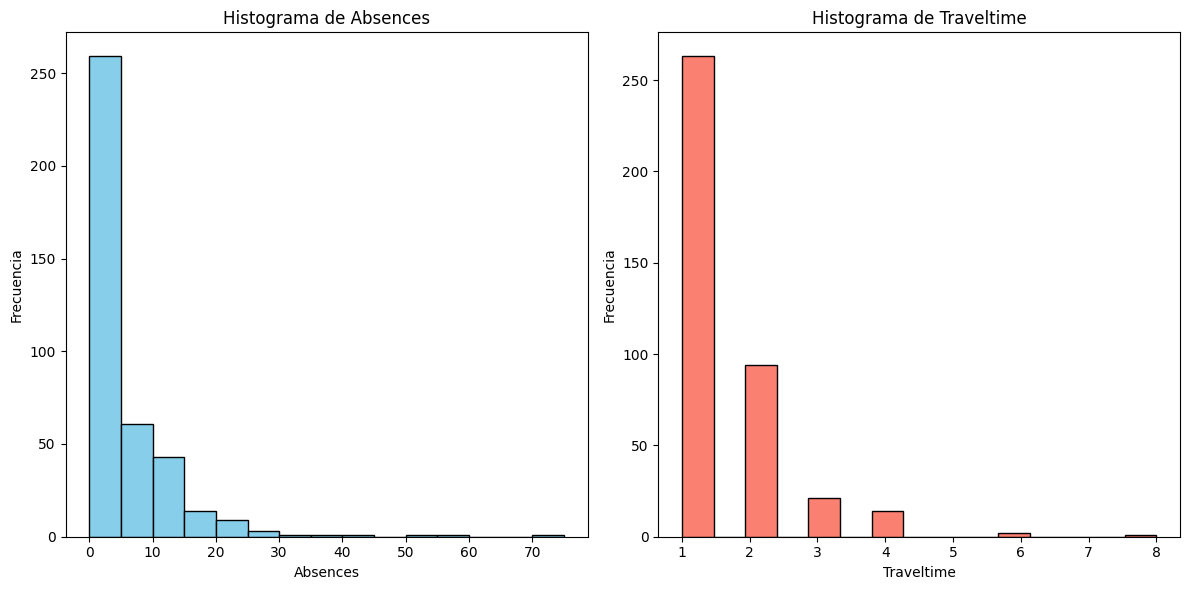

In [18]:
# Crear un histograma para 'absences'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df_abs_travel['absences'].plot(kind='hist', bins=15, color='skyblue', edgecolor='black')
plt.title('Histograma de Absences')
plt.xlabel('Absences')
plt.ylabel('Frecuencia')

# Crear un histograma para 'traveltime'
plt.subplot(1, 2, 2)
df_abs_travel['traveltime'].plot(kind='hist', bins=15, color='salmon', edgecolor='black')
plt.title('Histograma de Traveltime')
plt.xlabel('Traveltime')
plt.ylabel('Frecuencia')

# Mostrar los histogramas
plt.tight_layout()
plt.show()

Ahora la variable traveltime tendrá más valores sobre la moda, debido a que a los ausentes se les aplicó el valor de la moda, sin embargo, al ser pocos valores faltantes, no representa mucho ruido en los datos.

En el caso de absences al sustituir los valores nulos por la mediana, los datos se van a concentrar aún más en esa sección.

En ambos casos, no afecta mucho debido a que tanto la moda en "traveltime" como en "absences", hay mayor cantidad de muestra en sólo un punto o una categoría, por lo que no se agrega demasiado ruido a los datos